### Importa√ß√£o dos dados



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch
import matplotlib.ticker as tck


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

Ano_Trimestre
2020T1     94283.75
2020T2    131115.97
2020T3    115109.13
2020T4    100620.67
2021T1    123312.88
Name: Pre√ßo, dtype: float64

In [ ]:
#Concatenando as lojas
lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Convertendo a coluna 'Data' para o tipo datetime
lojas['Data da Compra'] = pd.to_datetime(lojas['Data da Compra'], dayfirst=True, errors='coerce')

# Exibindo as primeiras linhas do DataFrame
lojas.head()


0 Produto Categoria do Produto  Pre√ßo  Frete Data da Compra  \
0   94283.75     NaN                  NaN    NaN    NaN            NaT   
1  131115.97     NaN                  NaN    NaN    NaN            NaT   
2  115109.13     NaN                  NaN    NaN    NaN            NaT   
3  100620.67     NaN                  NaN    NaN    NaN            NaT   
4  123312.88     NaN                  NaN    NaN    NaN            NaT   

  Vendedor Local da compra  Avalia√ß√£o da compra Tipo de pagamento  \
0      NaN             NaN                  NaN               NaN   
1      NaN             NaN                  NaN               NaN   
2      NaN             NaN                  NaN               NaN   
3      NaN             NaN                  NaN               NaN   
4      NaN             NaN                  NaN               NaN   

   Quantidade de parcelas  lat  lon  
0                     NaN  NaN  NaN  
1                     NaN  NaN  NaN  
2                     NaN  NaN  NaN  
3                     NaN  NaN  NaN  
4                     NaN  NaN  NaN

#1. An√°lise do faturamento


In [ ]:
#Somando o faturamento total de cada loja
faturamentos = [
    loja1['Pre√ßo'].sum(),
    loja2['Pre√ßo'].sum(),
    loja3['Pre√ßo'].sum(),
    loja4['Pre√ßo'].sum()]

#Criando V√°riaveis anual
lojas = [loja1, loja2, loja3, loja4]
faturamentoanual = []

#Demonstrando a soma de cada loja anualmente
for i in lojas:
  i['Data da Compra'] = pd.to_datetime(i['Data da Compra'], dayfirst=True)
  i['Ano da Compra'] = i['Data da Compra'].dt.year
  faturamentoanual.append(i.groupby('Ano da Compra')['Pre√ßo'].sum())

#Criando uma V√°riavel trimestre
faturamento_trimestral = []

#Soma de cada loja trimestralmente
for i in lojas:
    i['Ano_Trimestre'] = i['Data da Compra'].dt.to_period('Q').astype(str)
    i['Ano_Trimestre'] = i['Ano_Trimestre'].apply(lambda x:x.replace('Q', 'T'))
    faturamento_trimestral.append(i.groupby('Ano_Trimestre')['Pre√ßo'].sum())

#Apresenta√ß√£o do resultado
for i in range(len(faturamentos)):
  print(f'O faturamento total da Loja {i+1} √© de R$ {faturamentos[i]:,.2f}')

O faturamento total da Loja 1 √© de R$ 1,534,509.12
O faturamento total da Loja 2 √© de R$ 1,488,459.06
O faturamento total da Loja 3 √© de R$ 1,464,025.03
O faturamento total da Loja 4 √© de R$ 1,384,497.58


In [ ]:
#V√°riaveis para apresenta√ß√£o gr√°fica
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
anos = list(faturamentoanual[0].index)
valores_por_loja = [list(faturamento.values) for faturamento in faturamentoanual]
trimestres_todos = sorted(set().union(*[loja.index for loja in faturamento_trimestral]))
valores_por_loja = [list(faturamento.values) for faturamento in faturamento_trimestral]

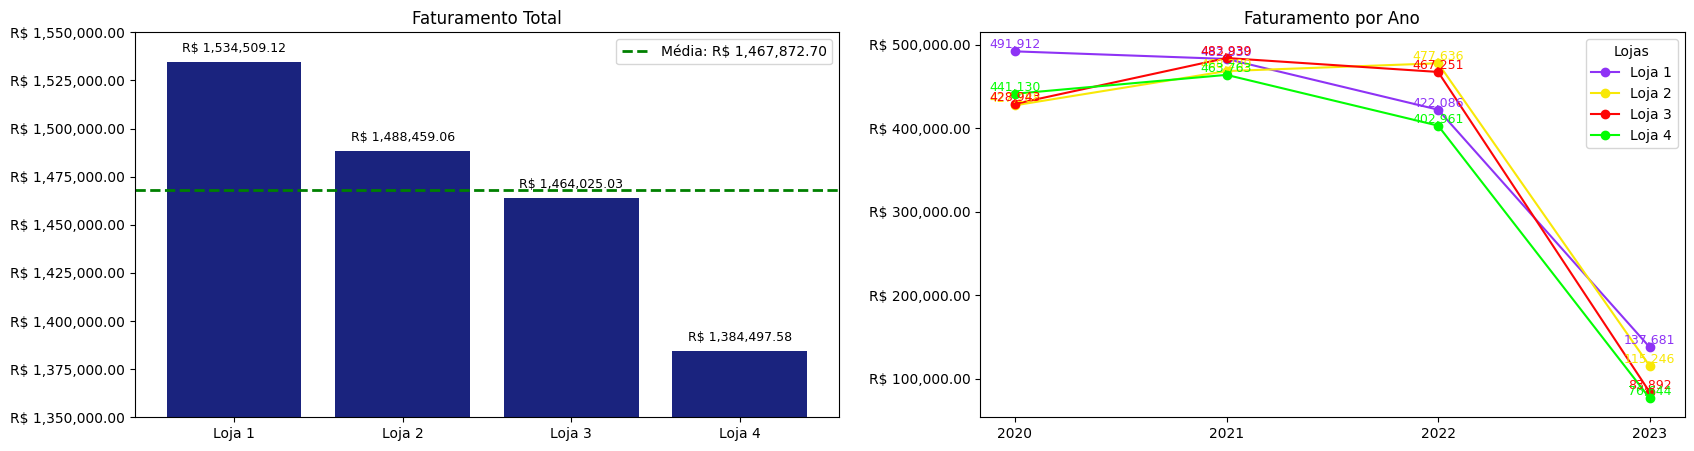

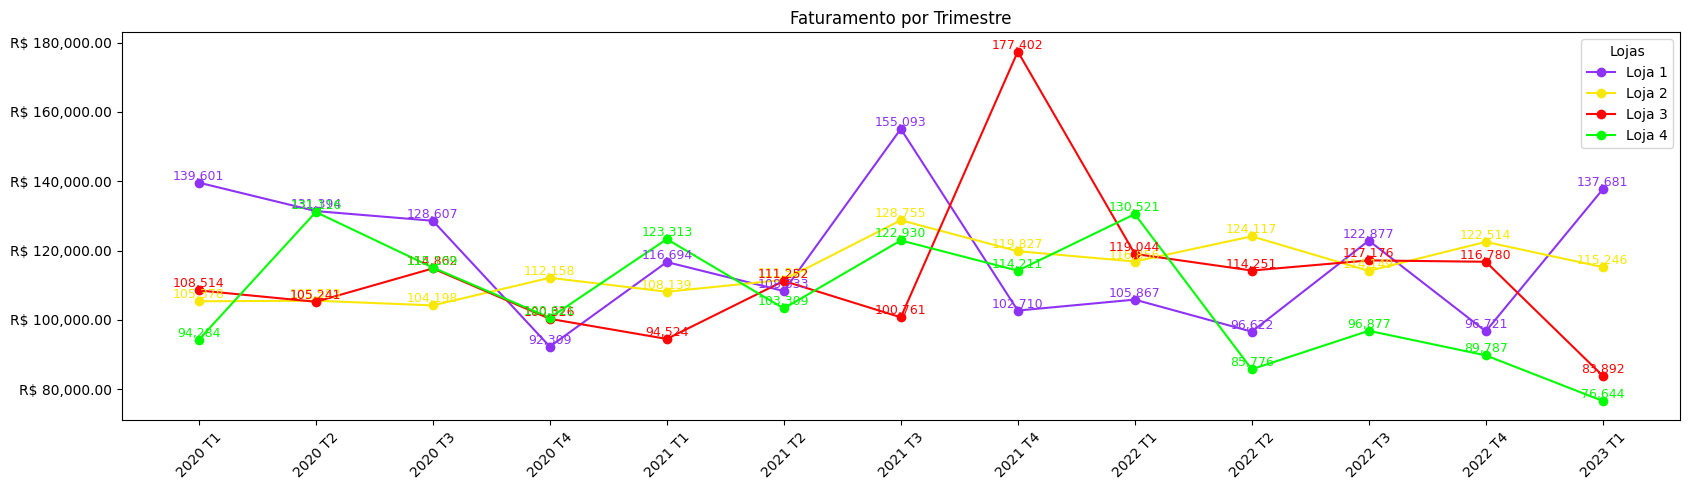

In [ ]:
#V√°riaveis para apresenta√ß√£o gr√°fica
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
anos = list(faturamentoanual[0].index)
valores_por_loja = [list(faturamento.values) for faturamento in faturamentoanual]
trimestres_todos = sorted(set().union(*[loja.index for loja in faturamento_trimestral]))
valores_por_loja = [list(faturamento.values) for faturamento in faturamento_trimestral]

#Defini√ß√£o de cores e tamanhos dos gr√°ficos
cores_linhas = ["#8E33F5", "#F8E807", "#FD0505", "#03FD03"]
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
fig, ay = plt.subplots(figsize=(17, 5))

#Gr√°fico de barras - Faturamento Total
bars = ax[0].bar(lojas, faturamentos, color='#1A237E')
ax[0].set_title('Faturamento Total')
ax[0].yaxis.set_major_formatter(tck.StrMethodFormatter('R$ {x:,.2f}'))
ax[0].set_ylim(1350000, 1550000)

media_faturamento = sum(faturamentos) / len(faturamentos)
ax[0].axhline(media_faturamento, color='green', linestyle='--', linewidth=2, label=f'M√©dia: R$ {media_faturamento:,.2f}')
ax[0].legend()

for bar in bars:
    height = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width() / 2, height + 3500, f'R$ {height:,.2f}', ha='center', va='bottom', color='black', fontsize=9)

#Gr√°fico de linhas - Anual
for i, loja in enumerate(faturamentoanual):
  anos = loja.index
  valores = loja.values
  ax[1].plot(anos, valores, marker='o', label=f'Loja {i + 1}', color = cores_linhas[i])
  for ano, valor in zip(anos, valores):
    ax[1].text(ano, valor, f'{valor:,.0f}', color = cores_linhas[i], ha='center', va='bottom', fontsize=9)

anos_todos = sorted(set().union(*[loja.index for loja in faturamentoanual]))
ax[1].margins(0.055)
ax[1].set_xticks(anos_todos)
ax[1].set_xticklabels(anos_todos)
ax[1].set_title('Faturamento por Ano')
ax[1].legend(title='Lojas')
ax[1].yaxis.set_major_formatter(tck.StrMethodFormatter('R$ {x:,.2f}'))

#Gr√°fico de linhas - Trimestral
for i, loja in enumerate(faturamento_trimestral):
    trimestres = loja.index.astype(str)
    valores = loja.values
    ay.plot(trimestres, valores, marker='o', label=f'Loja {i + 1}', color=cores_linhas[i])
    for trimestre, valor in zip(trimestres, valores):
        ay.text(trimestre, valor, f'{valor:,.0f}', color=cores_linhas[i], ha='center', va='bottom', fontsize=9)

ay.margins(0.055)
ay.set_xticks(range(len(trimestres_todos)))
ay.set_xticklabels([str(trimestre).replace('T', ' T') for trimestre in trimestres_todos], rotation=45)
ay.set_title('Faturamento por Trimestre')
ay.legend(title='Lojas')
ay.yaxis.set_major_formatter(tck.StrMethodFormatter('R$ {x:,.2f}'))

#Ajustes finais dos gr√°ficos
plt.subplots_adjust(wspace=6)
plt.tight_layout()
plt.show()

In [ ]:
# Quais vendedores tiveram a maior venda entre as quatro lojas.

import pandas as pd
# Combinando todas as lojas em um √∫nico DataFrame
lojas_completo = pd.concat([loja1.assign(Loja='Loja 1'), loja2.assign(Loja='Loja 2'), loja3.assign(Loja='Loja 3'), loja4.assign(Loja='Loja 4')], ignore_index=True)

# Encontrando o vendedor com a maior venda em cada loja
maior_venda_por_loja = lojas_completo.loc[lojas_completo.groupby('Loja')['Pre√ßo'].idxmax()]

# Selecionando as colunas relevantes e renomeando
maior_venda_por_loja = maior_venda_por_loja[['Loja', 'Vendedor', 'Pre√ßo']].rename(columns={'Pre√ßo': 'Maior Venda'})

print("Vendedores com a maior venda em cada loja:")
maior_venda_por_loja

Vendedores com a maior venda em cada loja:


Loja          Vendedor  Maior Venda
1675  Loja 1  Isabella Pereira      3969.38
4322  Loja 2       Pedro Gomes      3937.85
7013  Loja 3     Juliana Costa      3957.62
7724  Loja 4    Lucas Oliveira      3869.56

# 2. Vendas por Categoria


In [ ]:
#categoria de produto em cada loja
loja1_categoria = loja1.groupby('Categoria do Produto')['Pre√ßo'].sum()
loja2_categoria = loja2.groupby('Categoria do Produto')['Pre√ßo'].sum()
loja3_categoria = loja3.groupby('Categoria do Produto')['Pre√ßo'].sum()
loja4_categoria = loja4.groupby('Categoria do Produto')['Pre√ßo'].sum()

categoria_vendas = pd.DataFrame({
    'loja 1': loja1_categoria,
    'loja 2': loja2_categoria,
    'loja 3': loja3_categoria,
    'loja 4': loja4_categoria
})

#Organizando por colunas
categoria_vendas = categoria_vendas.T

#Somando os totais de vendas por categoria
categoria_vendas['Total'] = categoria_vendas.sum(axis=1)
categoria_vendas.sort_values(by='Total', ascending=False)

Categoria do Produto  brinquedos  eletrodomesticos  eletronicos  \
loja 1                  23993.78         484913.36    572659.23   
loja 2                  21262.21         464758.13    547773.71   
loja 3                  25869.20         438984.89    547699.92   
loja 4                  27015.67         377680.65    545966.86   

Categoria do Produto  esporte e lazer  instrumentos musicais    livros  \
loja 1                       52387.55              121731.69  11713.92   
loja 2                       46326.09              139987.03  13454.35   
loja 3                       47456.10              103174.45  12664.70   
loja 4                       44465.65              100136.50  12427.77   

Categoria do Produto     moveis  utilidades domesticas       Total  
loja 1                250178.11               16931.48  1534509.12  
loja 2                235234.68               19662.86  1488459.06  
loja 3                268095.56               20080.21  1464025.03  
loja 4                256705.65               20098.83  1384497.58

In [ ]:
lojas = [loja1, loja2, loja3, loja4]
categorias = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

categoria_vendas = [l.groupby('Categoria do Produto').size().rename(n)
    for l, n in zip(lojas, categorias)]

categoria_vendas = pd.concat(categoria_vendas, axis=1)
categoria_vendas.columns = categorias

print(categoria_vendas)


                       Loja 1  Loja 2  Loja 3  Loja 4
Categoria do Produto                                 
brinquedos                324     313     315     338
eletrodomesticos          312     305     278     254
eletronicos               448     422     451     451
esporte e lazer           284     275     277     277
instrumentos musicais     182     224     177     170
livros                    173     197     185     187
moveis                    465     442     499     480
utilidades domesticas     171     181     177     201


#Categoria dos produtos mais vendidos

<ipython-input-56-8d944eaa26c1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendas_por_categoria_total_ordenado.index, y=vendas_por_categoria_total_ordenado.values, palette='viridis')


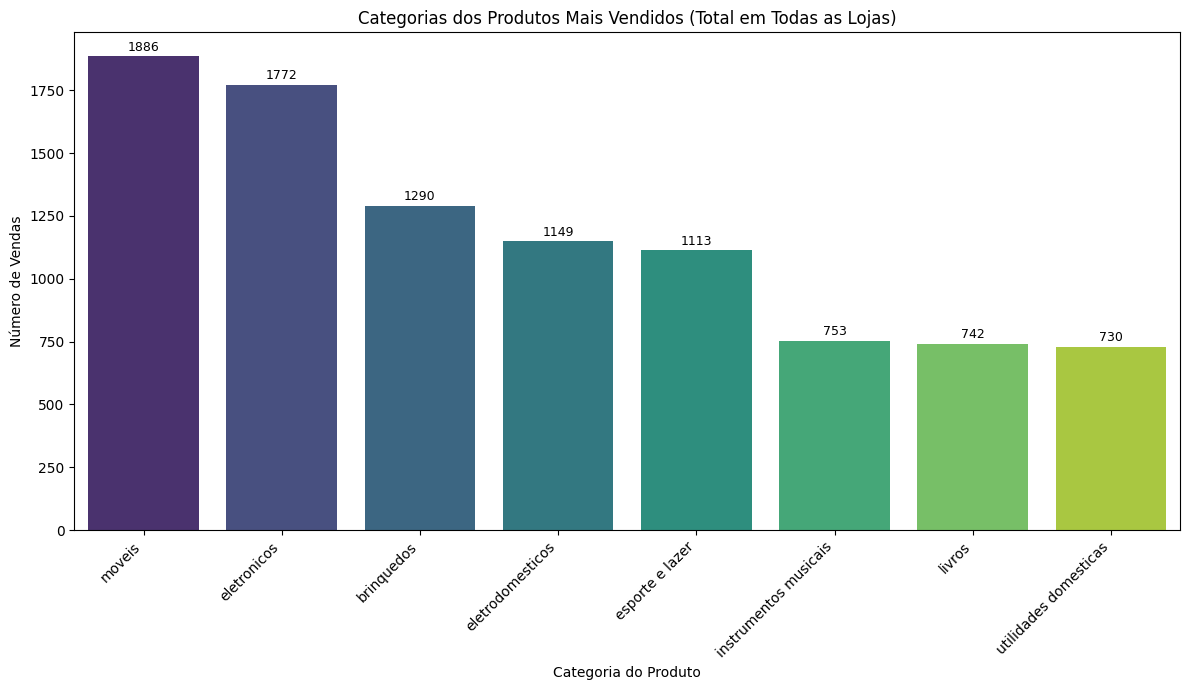

In [ ]:
import matplotlib.pyplot as plt
# Somando a contagem de vendas por categoria em todas as lojas
vendas_por_categoria_total = categoria_vendas.sum(axis=1)

# Ordenando as categorias pela contagem total de vendas (do maior para o menor)
vendas_por_categoria_total_ordenado = vendas_por_categoria_total.sort_values(ascending=False)

# Criando o gr√°fico de barras
plt.figure(figsize=(12, 7))
sns.barplot(x=vendas_por_categoria_total_ordenado.index, y=vendas_por_categoria_total_ordenado.values, palette='viridis')
plt.title('Categorias dos Produtos Mais Vendidos (Total em Todas as Lojas)')
plt.xlabel('Categoria do Produto')
plt.ylabel('N√∫mero de Vendas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adicionando os valores no topo de cada barra
for i, count in enumerate(vendas_por_categoria_total_ordenado.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=9)

plt.show()

# 3. M√©dia de Avalia√ß√£o das Lojas

In [ ]:
# @title Calculo de Avali√ß√£o M√©dia das lojas

media_por_loja = pd.DataFrame({
    'Lojas': ['Loja 1','Loja 2','Loja 3','Loja 4'],
    'Media Avalc. Compra': [
        loja1["Avalia√ß√£o da compra"].mean(),
        loja2["Avalia√ß√£o da compra"].mean(),
        loja3["Avalia√ß√£o da compra"].mean(),
        loja4["Avalia√ß√£o da compra"].mean()
    ]
})
print("\n‚≠ê Avalia√ß√£o m√©dia por loja (de 1 a 5):\n")
media_por_loja.sort_values(by='Media Avalc. Compra', ascending=False).round(2)


‚≠ê Avalia√ß√£o m√©dia por loja (de 1 a 5):



Lojas  Media Avalc. Compra
2  Loja 3                 4.05
1  Loja 2                 4.04
3  Loja 4                 4.00
0  Loja 1                 3.98

**Com base em minha analise referente as m√©dias de avalia√ß√£o podemos observar que:**
:
A loja 1 apresentou a menor avalia√ß√£o dos clientes, por√©m ainda podemos considerar essa loja com um bom redimento. Sobre esse resultado apresentado √© devido a uma logistica menos eficiente (frete m√©dio com valor elevado ou falha em uma gest√£o de p√≥s venda)

A loja 2 teve uma m√©dia de avalia√ß√£o de 4,04, mostrando assim um perfil mais equilibrado em suas categorias de vendas.

A loja 3 obteve a melhor m√©dida de avali√ß√£o, onde a satisfa√ß√£o de seus clientes e qualidade dos produtos ofericidos a seus consumidores.

Por fim a loja 4 com uma avalia√ß√£o de vendas muito inferior as demais, por√©m a satisfa√ß√£o dos clientes est√° em um n√≠vel superior a que vendeu mais produtos.

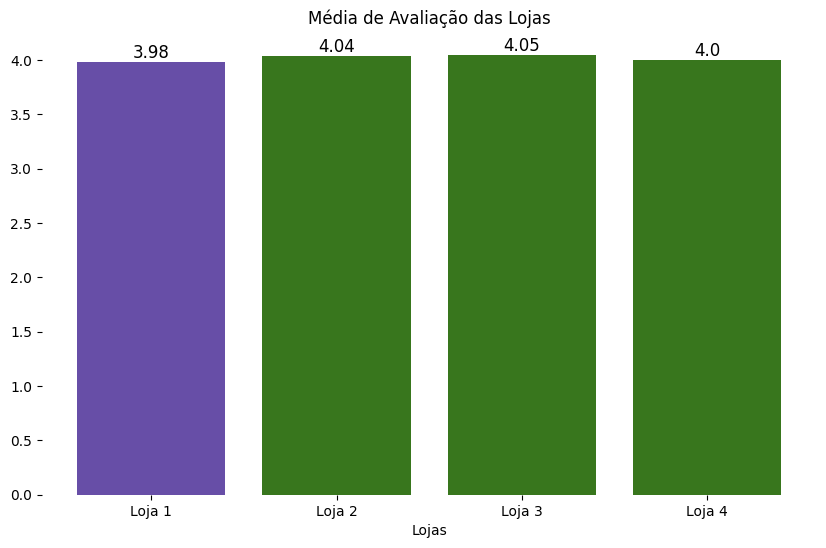

In [ ]:

from matplotlib.patches import Patch

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
medias = [3.98, 4.04, 4.05, 4.0]

pior_media = min(medias)
cores = ['#38761d' if media != pior_media else '#674ea7' for media in medias]

plt.figure(figsize=(10, 6))
bars = plt.bar(lojas, medias, color=cores)
plt.title('M√©dia de Avalia√ß√£o das Lojas')
plt.xlabel('Lojas')

for i, media in enumerate(medias):
    plt.text(i, media, f'{media}', ha='center', va='bottom', fontsize=12)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.show()

# 4. Produtos Mais e Menos Vendidos

In [ ]:
produtos_loja1 = loja1.groupby("Produto")["Quantidade de parcelas"].sum().reset_index(name="Quantidade Vendida")
produtos_loja1 = produtos_loja1.sort_values(by="Quantidade Vendida", ascending=False)

produtos_loja2 = loja2.groupby("Produto")["Quantidade de parcelas"].sum().reset_index(name="Quantidade Vendida")
produtos_loja2 = produtos_loja2.sort_values(by="Quantidade Vendida", ascending=False)

produtos_loja3 = loja3.groupby("Produto")["Quantidade de parcelas"].sum().reset_index(name="Quantidade Vendida")
produtos_loja3 = produtos_loja3.sort_values(by="Quantidade Vendida", ascending=False)

produtos_loja4 = loja4.groupby("Produto")["Quantidade de parcelas"].sum().reset_index(name="Quantidade Vendida")
produtos_loja4 = produtos_loja4.sort_values(by="Quantidade Vendida", ascending=False)

print("Loja 1 - Produtos mais e menos vendidos:\n")
print("Mais vendidos:\n")
print(produtos_loja1.head(3).to_string(justify='left', index=False))
print("Menos vendidos:\n")
print(produtos_loja1.tail(3).to_string(justify='left', index=False), "\n\n\n")

print("Loja 2 - Produtos mais e menos vendidos:\n")
print("Mais vendidos:\n")
print(produtos_loja2.head(3).to_string(justify='left', index=False))
print("Menos vendidos:\n")
print(produtos_loja2.tail(3).to_string(justify='left', index=False), "\n\n\n")

print("Loja 3 - Produtos mais e menos vendidos:\n")
print("Mais vendidos:\n")
print(produtos_loja3.head(3).to_string(justify='left', index=False))
print("Menos vendidos:\n")
print(produtos_loja3.tail(3).to_string(justify='left', index=False), "\n\n\n")

print("Loja 4 - Produtos mais e menos vendidos:\n")
print("Mais vendidos:\n")
print(produtos_loja4.head(3).to_string(justify='left', index=False))
print("Menos vendidos:\n")
print(produtos_loja4.tail(3).to_string(justify='left', index=False), "\n\n\n")


Loja 1 - Produtos mais e menos vendidos:

Mais vendidos:

Produto             Quantidade Vendida
Secadora de roupas 214                
     TV Led UHD 4K 196                
            C√¥moda 188                
Menos vendidos:

Produto         Quantidade Vendida
Dinossauro Rex 94                 
       Mochila 90                 
  Celular ABXY 78                  



Loja 2 - Produtos mais e menos vendidos:

Mais vendidos:

Produto                   Quantidade Vendida
Iniciando em programa√ß√£o 223                
        Celular Plus X42 195                
                  Viol√£o 183                
Menos vendidos:

Produto         Quantidade Vendida
     Bicicleta 98                 
 Jogo de copos 98                 
Mesa de jantar 89                  



Loja 3 - Produtos mais e menos vendidos:

Mais vendidos:

Produto            Quantidade Vendida
        Bicicleta 191                
            Fog√£o 182                
Jogo de tabuleiro 181                
Menos vendi

In [ ]:
#Quantidade de produtos vendidos
venda_produtos = [
    loja1['Produto'].value_counts(),
    loja2['Produto'].value_counts(),
    loja3['Produto'].value_counts(),
    loja4['Produto'].value_counts()]

#Variav√©is para lista de produtos mais e menos vendidos
produtos_mais_vendidos = []
produtos_menos_vendidos = []

#Extra√ß√£o dos produtos mais e menos vendidos por loja
for vendas in venda_produtos:
    max_vendas = vendas.max()
    min_vendas = vendas.min()
    produtos_max = vendas[vendas == max_vendas]
    produtos_min = vendas[vendas == min_vendas]
    produtos_mais_vendidos.append(produtos_max)
    produtos_menos_vendidos.append(produtos_min)

#Apresenta√ß√£o do resultado
for i in range(len(produtos_mais_vendidos)):
    print(f"Loja {i + 1} - Produtos mais vendidos:")
    for produto, quantidade in produtos_mais_vendidos[i].items():
        print(f" - {produto}: {quantidade} vendas")
    print()

    print(f"Loja {i + 1} - Produtos menos vendidos:")
    for produto, quantidade in produtos_menos_vendidos[i].items():
        print(f" - {produto}: {quantidade} vendas")
    print()
    if i > 2:
        continue
    print("-" * 40)
    print()

Loja 1 - Produtos mais vendidos:
 - Micro-ondas: 60 vendas
 - TV Led UHD 4K: 60 vendas
 - Guarda roupas: 60 vendas

Loja 1 - Produtos menos vendidos:
 - Headset: 33 vendas
 - Celular ABXY: 33 vendas

----------------------------------------

Loja 2 - Produtos mais vendidos:
 - Iniciando em programa√ß√£o: 65 vendas

Loja 2 - Produtos menos vendidos:
 - Jogo de tabuleiro: 32 vendas

----------------------------------------

Loja 3 - Produtos mais vendidos:
 - Kit banquetas: 57 vendas

Loja 3 - Produtos menos vendidos:
 - Blocos de montar: 35 vendas

----------------------------------------

Loja 4 - Produtos mais vendidos:
 - Cama box: 62 vendas

Loja 4 - Produtos menos vendidos:
 - Guitarra: 33 vendas



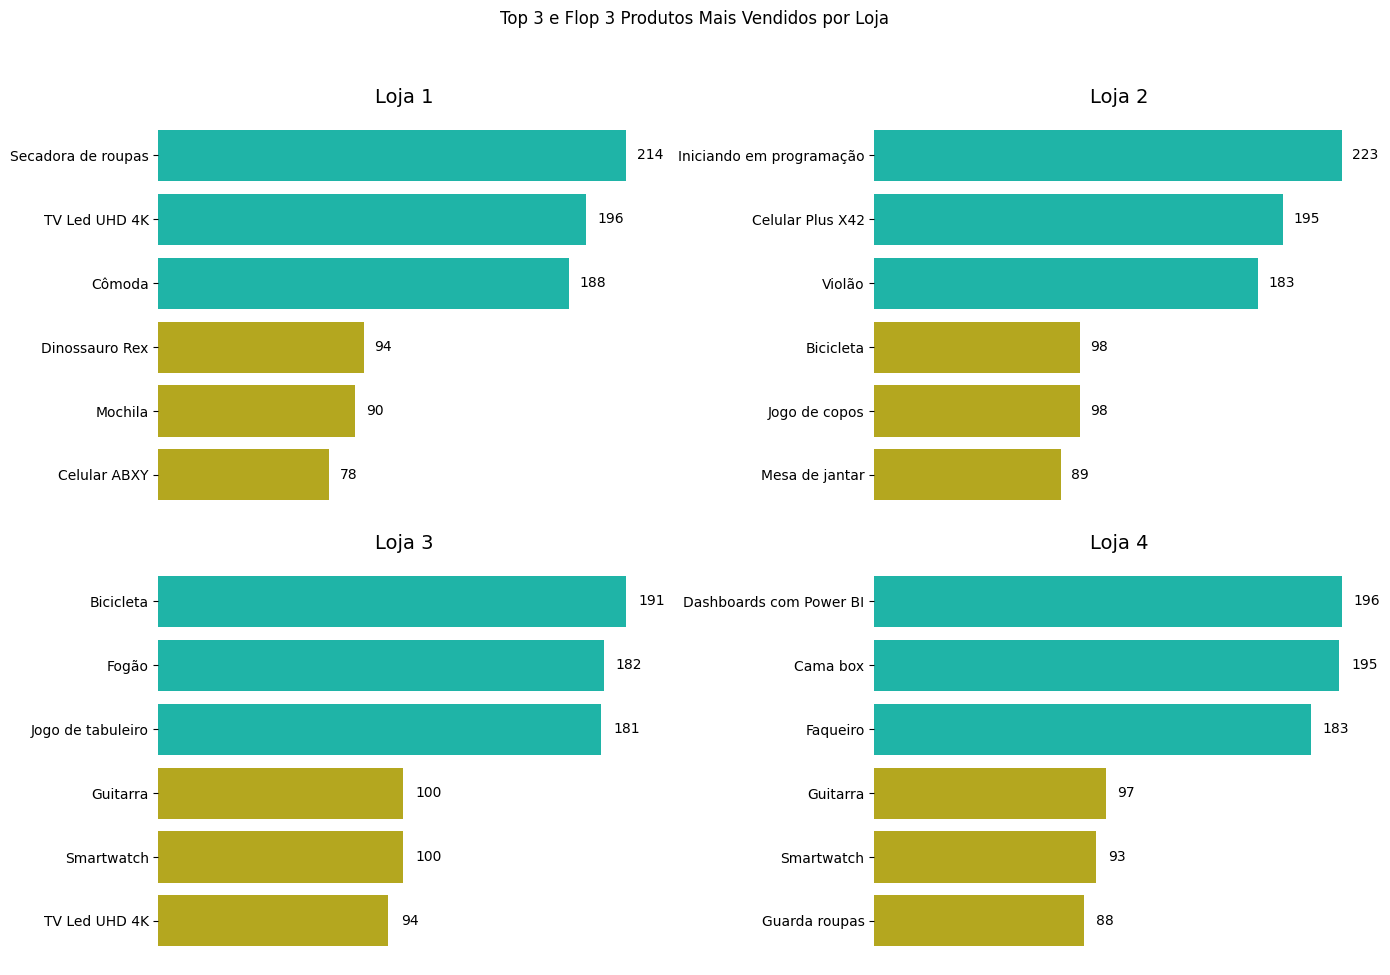

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

produtos_por_loja = {
    'Loja 1': (produtos_loja1.head(3), produtos_loja1.tail(3)),
    'Loja 2': (produtos_loja2.head(3), produtos_loja2.tail(3)),
    'Loja 3': (produtos_loja3.head(3), produtos_loja3.tail(3)),
    'Loja 4': (produtos_loja4.head(3), produtos_loja4.tail(3))
}

cores_top = '#1fb4a7'
cores_flop = '#b4a71f'

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for i, loja in enumerate(lojas):
    top3, flop3 = produtos_por_loja[loja]

    dados = pd.concat([top3, flop3])

    cores = [cores_top] * len(top3) + [cores_flop] * len(flop3)

    axs[i].barh(dados["Produto"], dados["Quantidade Vendida"], color=cores)
    axs[i].set_title(loja, fontsize=14)
    axs[i].invert_yaxis()
    axs[i].xaxis.set_visible(False)
    axs[i].grid(False)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['bottom'].set_visible(False)
    axs[i].spines['left'].set_visible(False)

    for j, v in enumerate(dados["Quantidade Vendida"]):
        axs[i].text(v + 5, j, str(v), va='center', fontsize=10)



fig.suptitle('Top 3 e Flop 3 Produtos Mais Vendidos por Loja')
plt.tight_layout(rect=[0, 0.01, 1, 0.95])
plt.show()

# 5. Frete M√©dio por Loja


In [87]:
#M√©dia do frete por loja
valor_frete = [
    round(loja1['Frete'].mean(),2),
    round(loja2['Frete'].mean(),2),
    round(loja3['Frete'].mean(),2),
    round(loja4['Frete'].mean(),2)]

media_frete = round((loja1['Frete'].sum() + loja2['Frete'].sum() + loja3['Frete'].sum() + loja4['Frete'].sum()) / (len(loja1['Frete']) + len(loja2['Frete']) + len(loja3['Frete']) + len(loja4['Frete'])),2)

#Apresenta√ß√£o do resultado
for i in range(len(valor_frete)):
  print(f'O frete m√©dio da Loja {i+1} √© de R$ {valor_frete[i]}')


O frete m√©dio da Loja 1 √© de R$ 34.69
O frete m√©dio da Loja 2 √© de R$ 33.62
O frete m√©dio da Loja 3 √© de R$ 33.07
O frete m√©dio da Loja 4 √© de R$ 31.28


# **Conclus√£o Final**

# Relat√≥rio de Vendas e Desempenho de cada Loja

---

## 1. Loja Mais Vantajosa: **Loja 1** üèÜ

A **Loja 1** se destaca como a mais vantajosa entre as op√ß√µes, devido aos seguintes fatores:

### Faturamento üí∞:
- **Loja 1** apresenta o **maior faturamento** entre todas as lojas, com um total de **R$ 1.534.509,12**. Isso indica um alto volume de vendas e estabilidade financeira.

### Vendas por Categoria üìä:
- A **Loja 1** se destaca principalmente em **eletr√¥nicos** (R$ 1.720.525,18) e **eletrodom√©sticos** (R$ 1.376.501,27), que s√£o categorias de alto valor.
- Embora tenha um desempenho consider√°vel nas outras categorias, ela √© muito forte nas mais lucrativas.

### Avalia√ß√£o M√©dia ‚≠ê:
- Com uma **avalia√ß√£o m√©dia de 3.98**, a **Loja 1** apresenta uma boa avalia√ß√£o, mostrando que os clientes est√£o, em geral, satisfeitos com a experi√™ncia de compra.

### Produtos Mais e Menos Vendidos üì¶:
- A **Loja 1** tem produtos como a **TV Led UHD 4K** (R$ 189.534,28) e a **Geladeira** (R$ 149.524,28) entre os itens que mais geraram receita.
- Apesar de ter produtos que geraram menos receita, como o **Cubo M√°gico 8x8** (R$ 929,27), esses representam uma minoria em compara√ß√£o aos produtos mais lucrativos.

### Frete M√©dio üöö:
- O custo de **frete m√©dio** na **Loja 1** √© de **R$ 34.69**, que √© razo√°vel, mas a alta receita gerada compensa esse custo.

### Conclus√£o üéØ:
A **Loja 1** √© a mais vantajosa devido ao seu alto **faturamento**, bom desempenho em categorias de alto valor, boa **avalia√ß√£o m√©dia** e produtos com **grande receita gerada**. √â uma loja com bom potencial de crescimento e estabilidade.

---

## 2. Loja Menos Vantajosa: **Loja 4** ‚ùå

A **Loja 4**, apesar de ter alguns pontos positivos, √© a **menos vantajosa** por diversos motivos:

### Faturamento üí∏:
- A **Loja 4** tem o **menor faturamento** entre as lojas analisadas, com um total de **R$ 1.384.497,58**, o que indica um desempenho mais fraco em rela√ß√£o √†s outras lojas.

### Vendas por Categoria üìâ:
- Embora a **Loja 4** tenha boas vendas em **eletr√¥nicos** (R$ 1.615.256,00) e **eletrodom√©sticos** (R$ 1.172.119,35), o volume geral de vendas √© o menor, o que limita seu crescimento.

### Avalia√ß√£o M√©dia ‚≠ê:
- A **Loja 4** tem uma **avalia√ß√£o m√©dia de 4.00**, que √© boa, mas n√£o se destaca tanto quanto as outras lojas (a **Loja 3**, por exemplo, tem a avalia√ß√£o mais alta com 4.05).

### Produtos Mais e Menos Vendidos üì¶:
- Os produtos da **Loja 4**, como **Corda de Pular** (R$ 939,74) e **Cubo M√°gico 8x8** (R$ 997,38), s√£o os que menos geraram receita, o que pode indicar que a loja possui produtos com menor atratividade ou valor agregado.

### Frete M√©dio üöö:
- O custo de **frete m√©dio** da **Loja 4** √© o mais baixo, **R$ 31.28**, o que pode ser positivo em termos de custo-benef√≠cio. No entanto, esse valor n√£o compensa as baixas vendas e o faturamento reduzido.

### Conclus√£o üö´:
A **Loja 4** √© a **menos vantajosa** devido ao **menor faturamento**, desempenho abaixo nas vendas totais, e a **avalia√ß√£o m√©dia** que, embora boa, n√£o √© a melhor entre as lojas. Al√©m disso, ela tem uma **menor receita de produtos**, o que pode indicar dificuldades em atrair consumidores para suas ofertas.

---

## 3. Loja que o Sr. Jo√£o deve se desfazer: **Loja 4** ‚ùå

De acordo com a an√°lise do desempenho das lojas, o Sr. Jo√£o deve considerar a venda da **Loja 4**, pelos seguintes motivos:

### Faturamento e Desempenho Global üí∏:
- A **Loja 4** tem o menor faturamento entre as lojas analisadas e n√£o apresenta um desempenho suficiente para competir com as demais.

### Produtos com Menor Receita üìâ:
- Os produtos da **Loja 4** geraram menos receita, o que indica um portf√≥lio menos atrativo.

### Baixa Rentabilidade ‚ö†Ô∏è:
- Apesar do custo de frete ser o mais baixo, o desempenho fraco nas vendas e o faturamento limitado fazem com que a loja seja uma op√ß√£o menos rent√°vel.

### Conclus√£o üéØ:
A **Loja 4** √© a menos vantajosa para o Sr. Jo√£o, que deve considerar se desfazer dela para focar em lojas com melhor performance.

---

## Conclus√£o Final üìù

- **Loja Mais Vantajosa**: **Loja 1** üèÖ (Maior faturamento, bom desempenho nas categorias de alto valor, boa avalia√ß√£o m√©dia e produtos com alta receita).
- **Loja Menos Vantajosa**: **Loja 4** ‚ùå (Menor faturamento, desempenho abaixo nas vendas gerais, avalia√ß√£o m√©dia razo√°vel e produtos com baixa receita).
- **Loja a ser Vendida pelo Sr. Jo√£o**: **Loja 4** ‚ùå (Devido ao menor faturamento, baixo desempenho e falta de rentabilidade).